  <font size = "10">This  is a script meant to be run in the chimera x ENV (python 3.9.11) dataed for 20230306 <font size = "4"> 
      Author-YML 
      date- 20230306

<font size = "5">

Objective: outpit metrics for surface topology to describe phenotypess (rough and smooth phagocytic cup progression)

Run the following script in ChimeraX command line to output:

#Inital settings#

open X:\Phagocytosis\sRBC\20190614cs1\track_4\test\*488nm*.tif
open X:\Phagocytosis\sRBC\20190614cs1\track_4\test\*560nm*.tif

volume #2 style surface level 118 color #ffd059
volume #1 style surface level 73 color #2b5884

lighting full; 
lighting depthcue false; 
brackground transparent;
ui tool show Shell;

Start of working in the Chimera X shell:

These are the imports needed for the script

In [ ]:
import numpy
from numpy import arccos, arctan, split, sqrt, subtract

from chimerax.color_key import show_key
from chimerax.core import colors
from chimerax.core.commands import (BoolArg, Bounded, CmdDesc, ColormapArg,
                                    ColormapRangeArg, Int2Arg, IntArg,
                                    SurfacesArg)
from chimerax.core.commands.cli import EnumOf
from numpy import (array, full, inf, isnan, nanmax, nanmean, nanmin,
                   ravel_multi_index, swapaxes)
from scipy.ndimage import (binary_dilation, binary_erosion,
                           generate_binary_structure, iterate_structure)
from numpy import arccos, arctan, split, sqrt, subtract, sign
from scipy.spatial import KDTree


In this script we state that the
macrophage membrane = m[1]
sRBC = m[3]


the following script is outputs the metrics dist(distance from the centroid to the point), theta (angle around z on the x,y plane) and phi (angle between z axis and x,y plane)

In [ ]:
s= session
m= s.models

centroid = numpy.mean(m[3].vertices, axis = 0)

x_coord, y_coord, z_coord = split(subtract(centroid, m[1].vertices), 3, 1)

z_squared = z_coord ** 2
y_squared = y_coord ** 2
x_squared = x_coord ** 2

dist = sqrt(z_squared + y_squared + x_squared)

distxy = sqrt(x_squared + y_squared)

""
theta = sign(y_coord)*arccos(x_coord / distxy)

phi = arccos(z_coord / dist)

this is ment to give the models the arguments for the output meterics

In [ ]:
m[1].theta = theta

m[1].phi = phi

m[1].dist = dist

This is an import to look at the values plotted

In [ ]:
import matplotlib.pyplot as plt

Used to varify that the x,y,z outputs are output correctly

In [ ]:
fig= plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_coord, y_coord, (-z_coord), c=(-z_coord))

ax.set_title('Scatter plot of points: x, y, -z')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('-Z') 
plt.show()

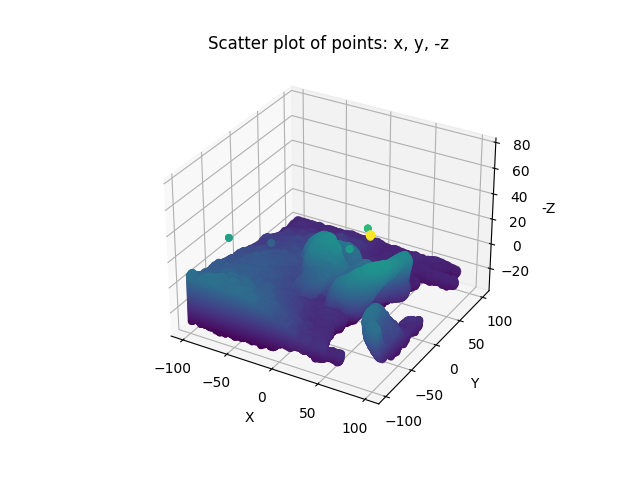

Surface recoloring of the 

From this point I want to see the surface recoloring and histogram of vertices with angle theta

In [ ]:
palette = None
color_range = 'full'

measurement = m[1].dist
palette_string = 'brbg'
max_range = 15

In [ ]:
if isnan(measurement).all():
    measurement[:] = 0

    if palette is None:
        palette = colors.BuiltinColormaps[palette_string]

    if color_range is not None and color_range != 'full':
        rmin, rmax = color_range
    elif color_range == 'full':
        rmin, rmax = nanmin(measurement), nanmax(measurement)
    else:
        rmin, rmax = (0, max_range)


In [ ]:
cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:,0])

In [ ]:
plt.hist(m[1].dist)
plt.title('distance histogram')
plt.xlabel('intergated distance um')
plt.ylabel('counts')
plt.show()

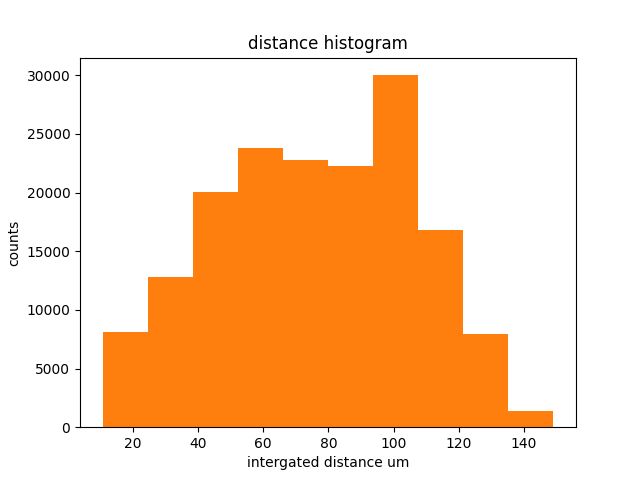

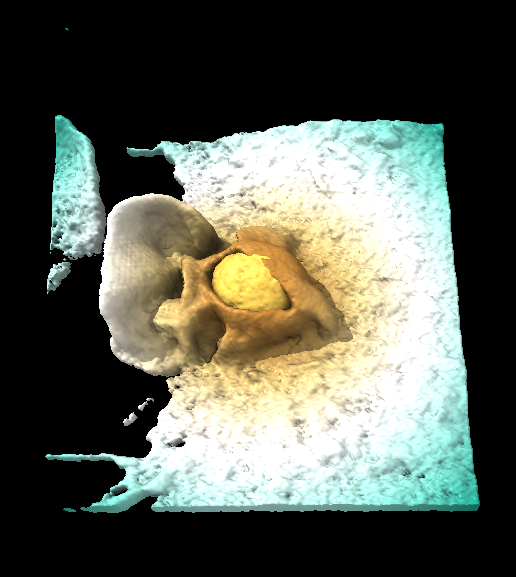

In [ ]:
palette = None
color_range = 'full'
m[1].theta = theta*(180/numpy.pi)
measurement = m[1].theta
palette_string = 'brbg'
max_range = 15

In [ ]:
if isnan(measurement).all():
    measurement[:] = 0


In [ ]:

    if palette is None:
        palette = colors.BuiltinColormaps[palette_string]

    if color_range is not None and color_range != 'full':
        rmin, rmax = color_range
    elif color_range == 'full':
        rmin, rmax = nanmin(measurement), nanmax(measurement)
    else:
        rmin, rmax = (0, max_range)


In [ ]:
cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:,0])

In [ ]:
plt.hist(m[1].theta)
plt.title('theta histogram')
plt.xlabel('theta degrees')
plt.ylabel('counts')
plt.show()

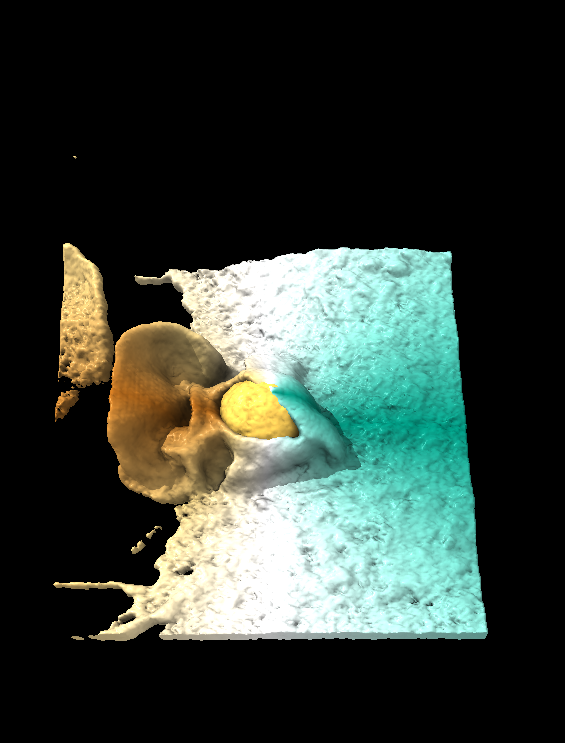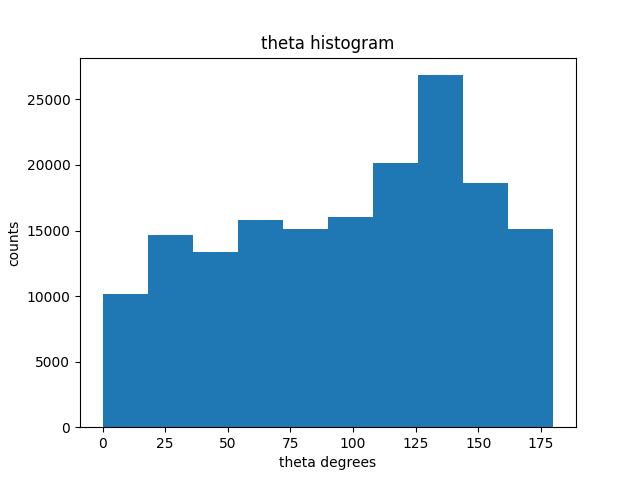

In [ ]:
palette = None
color_range = 'full'
m[1].phi = phi*(180/numpy.pi)
measurement = m[1].phi
palette_string = 'brbg'
max_range = 15

In [ ]:
if isnan(measurement).all():
    measurement[:] = 0

In [ ]:

if palette is None:
    palette = colors.BuiltinColormaps[palette_string]

if color_range is not None and color_range != 'full':
    rmin, rmax = color_range
elif color_range == 'full':
    rmin, rmax = nanmin(measurement), nanmax(measurement)
else:
    rmin, rmax = (0, max_range)

In [ ]:
plt.hist(m[1].phi)
plt.title('phi histogram')
plt.xlabel('phi degrees')
plt.ylabel('counts')
plt.show()

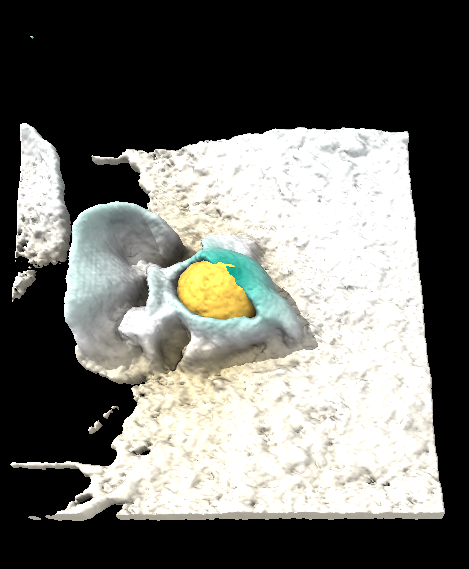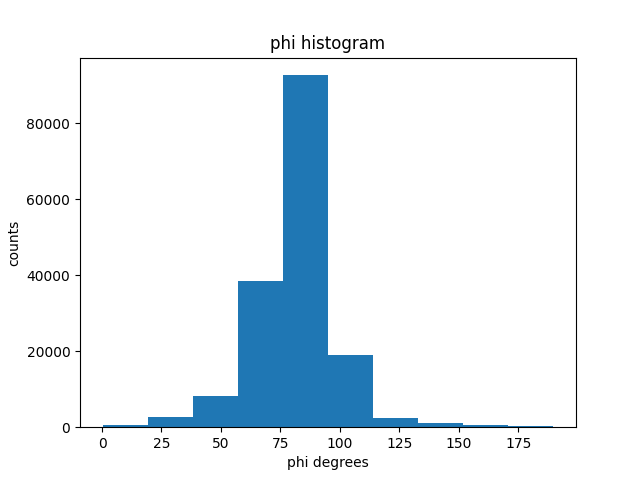

In [ ]:
theta = arctan(x_coord / y_coord)

palette = None
color_range = 'full'
m[1].theta = theta*(180/numpy.pi)
measurement = m[1].theta
palette_string = 'brbg'
max_range = 15

In [ ]:
if isnan(measurement).all():
    measurement[:] = 0

In [ ]:
if palette is None:
    palette = colors.BuiltinColormaps[palette_string]

if color_range is not None and color_range != 'full':
    rmin, rmax = color_range
elif color_range == 'full':
    rmin, rmax = nanmin(measurement), nanmax(measurement)
else:
    rmin, rmax = (0, max_range)

In [ ]:
cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:,0])

In [ ]:
plt.hist(m[1].theta)
plt.title('theta histogram')
plt.xlabel('theta degrees')
plt.ylabel('counts')
plt.show()

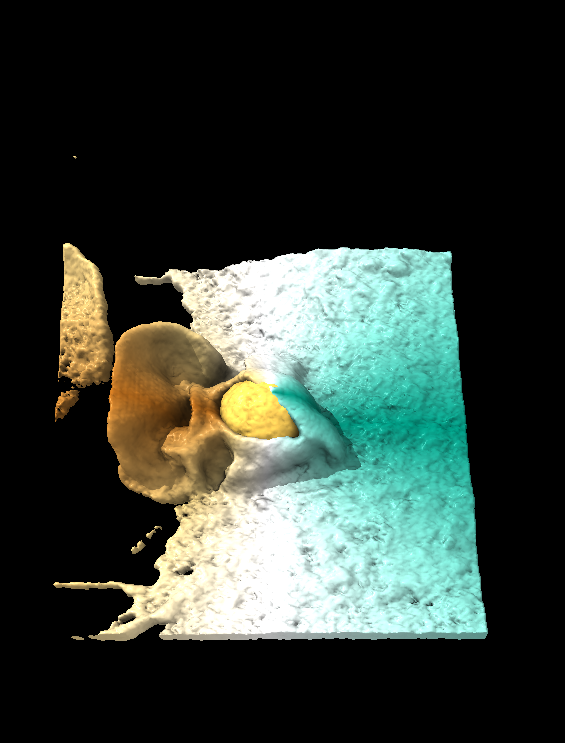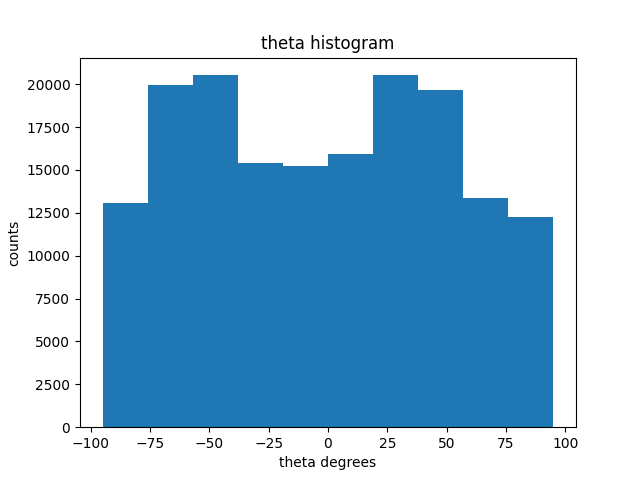